In [1]:
%%capture nop
import os 
IS_KAGGLE = not not os.environ.get('KAGGLE_KERNEL_RUN_TYPE','')
if IS_KAGGLE:
    !git clone https://github.com/Janluke0/PoS-Tagging/
    os.chdir('PoS-Tagging')
    !pip install positional-encodings
else:
    os.chdir('..')


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pytorch_lightning as pl
import torch
GPU = 1 if torch.cuda.is_available() else 0

In [3]:
from dataset.tokenizer import get_tokenizer
from dataset.twtita import mk_dataloaders, TWITADS

import model.recurrent.lstm as lstm
from model import TokenOfSeqClassifier

TAGS = TWITADS._TAGS

In [4]:
available = ["BPE", "WordPiece","BERT_pretrained", "ELECTRA_pretrained", "ROBERTA_pretrained", "DBERT_pretrained"]

In [5]:
def mk4tknzr(name):
    tknzr = get_tokenizer('resampled_train',name)
    ntags, dl_train = mk_dataloaders(tknzr,['resampled_train'],batch_size=256)
    vocab = tknzr.vocab_size if hasattr(tknzr,'vocab_size')  else tknzr.get_vocab_size()
    _, dl_val, dl_test = mk_dataloaders(tknzr,['resampled_validation','test'], shuffle=False,batch_size=256)
    model =  lstm.TokenOfSeqClassifier(d_input=vocab, d_model=128, d_output=ntags, dropout=0.1,add_embedding_projection=True)
    pl_model = TokenOfSeqClassifier(model, 
                                    nclass=len(TAGS),
                                    label_idx_to_ignore=[ TAGS['[EPAD]'],TAGS['[BOS]'], TAGS['[EOS]'], TAGS['[PAD]']])
    return pl_model, (dl_train,dl_val,dl_test)


def plot_curves(model):
    acc, loss = model.val_metrics['accuracy'],model.val_metrics['loss']
    print(acc[-1],max(acc))
    print(loss[-1],min(loss))
    plt.figure(figsize=(16,8))
    plt.subplot(121)
    plt.plot(acc)
    plt.subplot(122)
    plt.plot(loss)
    
early_stopping = lambda: pl.callbacks.EarlyStopping(monitor='val_acc',min_delta=1e-6,mode='max',patience=400)
checkpoints = lambda: pl.callbacks.ModelCheckpoint(monitor='val_acc',mode='max')

In [6]:
%%capture nop
model, (dl_train,dl_val,dl_test) = mk4tknzr('BPE')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9186139702796936 0.9204797744750977
0.172361820936203 0.07832827419042587


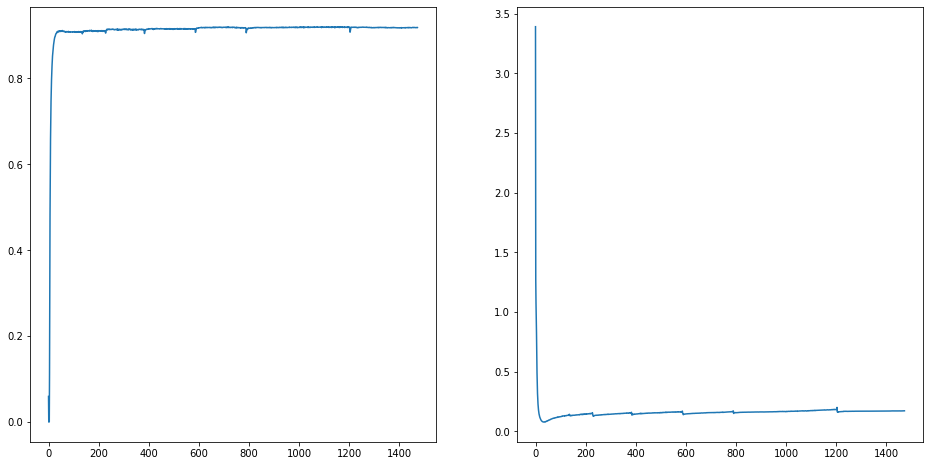

In [7]:
plot_curves(model)

In [8]:
%%capture nop
model, (dl_train,dl_val,dl_test) = mk4tknzr('WordPiece')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9080163240432739 0.9119267463684082
0.20775549113750458 0.08173736184835434


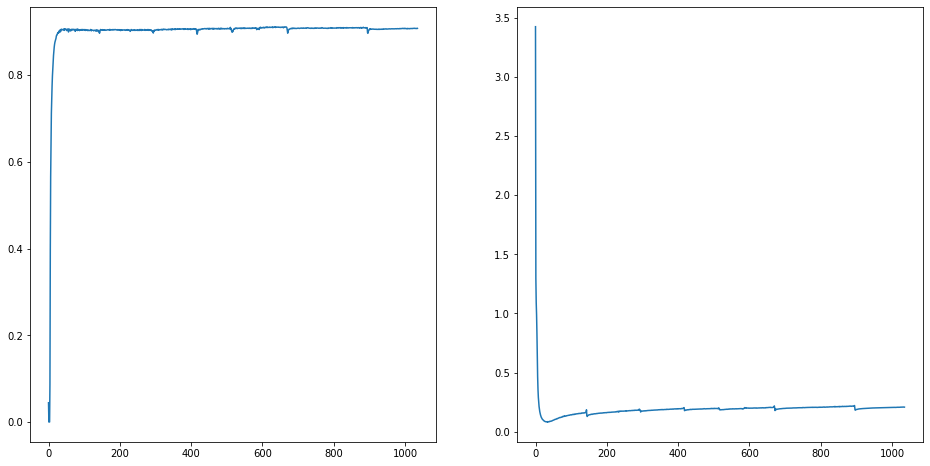

In [9]:
plot_curves(model)

In [10]:
%%capture nop
model, (dl_train,dl_val,dl_test) = mk4tknzr('BERT_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.8978848457336426 0.9042837023735046
0.29488247632980347 0.13839013874530792


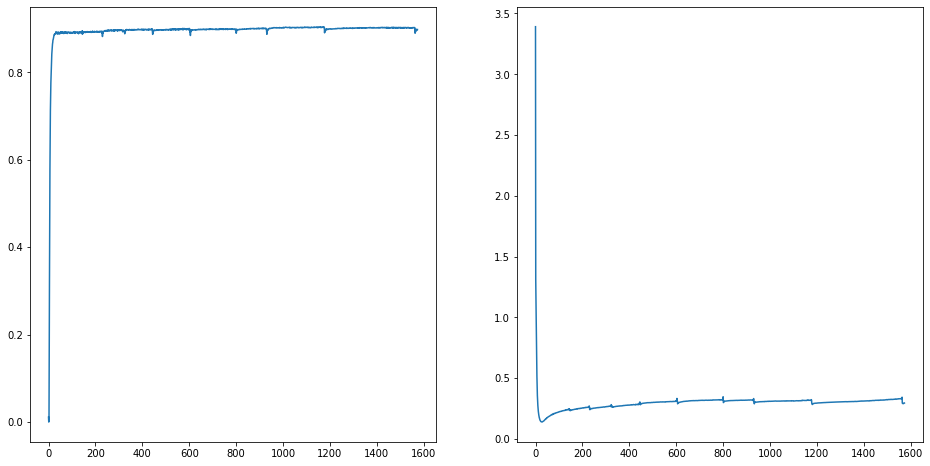

In [11]:
plot_curves(model)

In [12]:
%%capture nop
model, (dl_train,dl_val,dl_test) = mk4tknzr('DBERT_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9077743291854858 0.9096401333808899
0.30244964361190796 0.1544865071773529


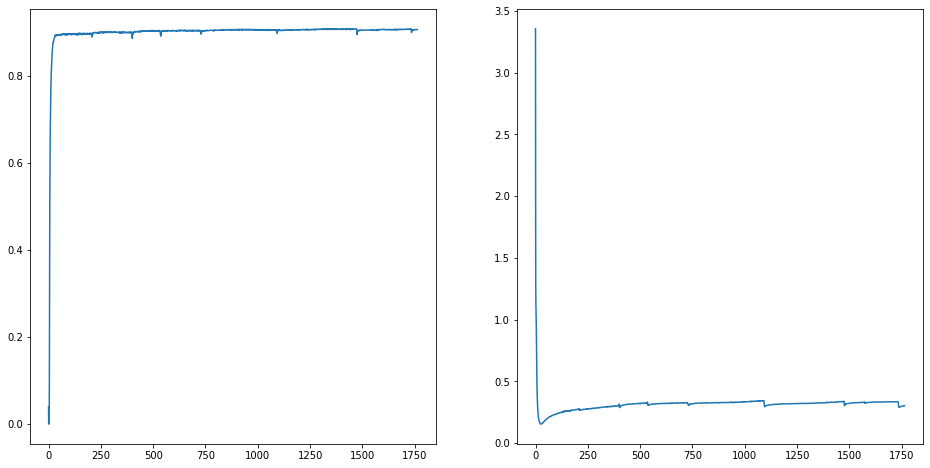

In [13]:
plot_curves(model)

In [14]:
%%capture nop
model, (dl_train,dl_val,dl_test) = mk4tknzr('ELECTRA_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9039537906646729 0.9039537906646729
0.298025906085968 0.14855127036571503


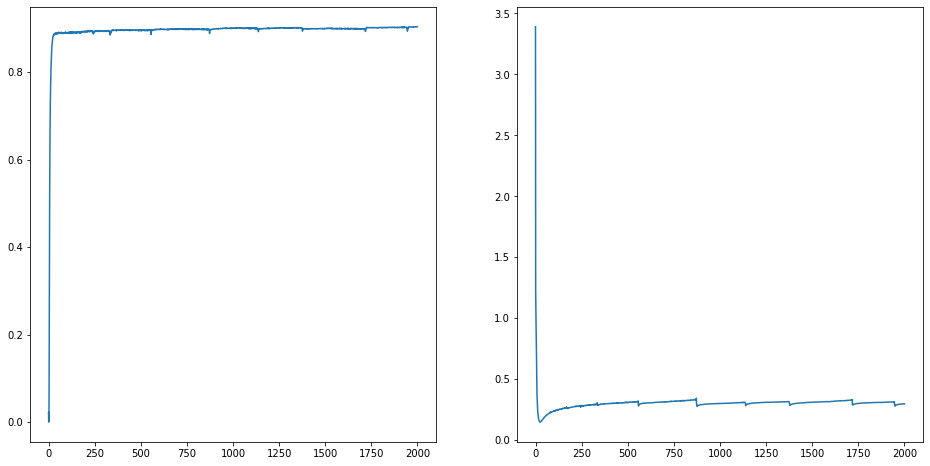

In [15]:
plot_curves(model)

In [16]:
%%capture nop
model, (dl_train,dl_val,dl_test) = mk4tknzr('ROBERTA_pretrained')
trainer = pl.Trainer(log_every_n_steps=2,gpus=GPU, max_epochs=2000, callbacks=[early_stopping(), checkpoints()])
trainer.fit(model, dl_train, dl_val)

0.9139049053192139 0.9156818985939026
0.2897963523864746 0.14566665887832642


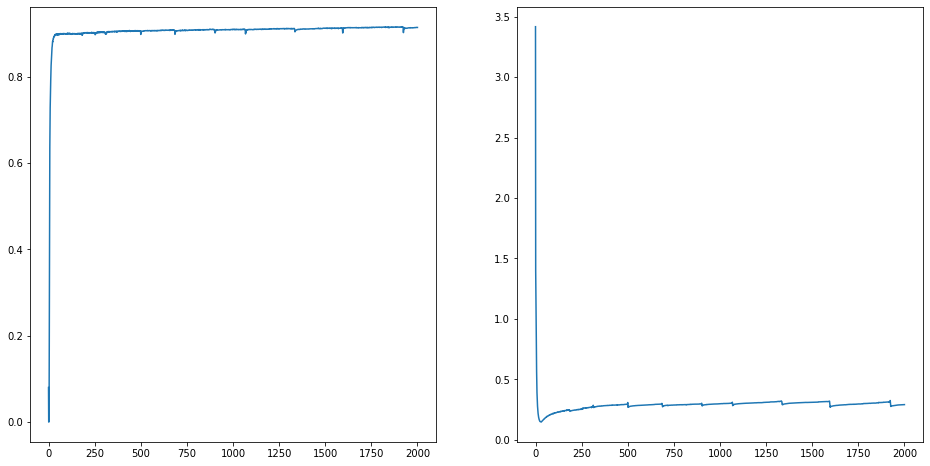

In [17]:
plot_curves(model)